# Training and Testing Model Predictions

In [1]:
#importing packages

import sys, os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

sys.path.append(os.path.abspath(os.path.join('..', 'utils')))
from utility import evaluate_cat_models, plot_precision_recall_vs_threshold
import model_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# initialize models

gnb = GaussianNB()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()


### Oversampling model

In [3]:
#importing datasets
train_set_os = pd.read_csv('../Data/ProcessedData/train_set_os.csv')
test_set_os = pd.read_csv('../Data/ProcessedData/test_set_os.csv')
train_set_os.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.358453,1,0.113858,1,0,0,1.559160,0.370856,-1.364158,0
1,1,-0.268326,1,1.698224,0,0,1,-1.592367,0.370856,-0.647879,0
2,1,0.288811,1,-0.203015,0,0,1,0.181121,-1.381341,-0.062918,0
3,0,0.288811,1,-0.678324,0,2,1,0.189704,-1.381341,-0.098731,1
4,1,0.079884,1,0.113858,0,0,1,0.381285,0.370856,-0.588189,0


In [4]:
X_train_os = train_set_os.drop('Response', axis=1)
y_train_os = train_set_os['Response']
X_test_os = test_set_os.drop('Response', axis=1)
y_test_os = test_set_os['Response']

In [5]:
model_list = [tree, gnb, forest, gradient_boost, ada_boost]

evaluate_cat_models(model_list, X_train_os, X_test_os, y_train_os, y_test_os, cv=5)

Fitting DecisionTreeClassifier()
Done with fitting....
DecisionTreeClassifier() cross validation
Done with cross validation


Fitting GaussianNB()
Done with fitting....
GaussianNB() cross validation
Done with cross validation


Fitting RandomForestClassifier()
Done with fitting....
RandomForestClassifier() cross validation
Done with cross validation


Fitting GradientBoostingClassifier()
Done with fitting....
GradientBoostingClassifier() cross validation
Done with cross validation


Fitting AdaBoostClassifier()
Done with fitting....
AdaBoostClassifier() cross validation
Done with cross validation




,DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()
Cross Validated Accuracy Mean,0.944224,0.784162,0.950348,0.797792,0.796740
Cross Validated Accuracy Std,0.000968,0.000870,0.000381,0.000632,0.000848
Matthews Coef,0.192973,0.374234,0.219123,0.397608,0.396426
Precision Score,0.296194,0.251777,0.341767,0.282188,0.280022
Recall Score,0.284969,0.976687,0.271769,0.923675,0.928359
F1 Score,0.290473,0.400349,0.302775,0.432305,0.430263


### Undersampling

In [6]:
#importing datasets
train_set_us = pd.read_csv('../Data/ProcessedData/train_set_us.csv')
test_set_us = pd.read_csv('../Data/ProcessedData/test_set_us.csv')
train_set_us.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1.963512,1,0.109859,1,0,1,0.596244,0.369077,-0.720041,0
1,1,-1.383247,1,-1.472772,0,1,1,0.061435,0.870116,1.708277,0
2,1,-1.104350,1,0.109859,1,1,0,-0.304569,0.870116,0.236932,0
3,0,-1.174074,1,-1.393640,0,1,1,-1.580702,1.013270,0.787191,0
4,1,-1.104350,1,-1.472772,1,1,0,0.498342,0.870116,-1.533468,0


In [7]:
X_train_us = train_set_us.drop('Response', axis=1)
y_train_us = train_set_us['Response']
X_test_us = test_set_us.drop('Response', axis=1)
y_test_us = test_set_us['Response']

In [8]:
model_list = [tree, gnb, forest, gradient_boost, ada_boost]

evaluate_cat_models(model_list, X_train_us, X_test_us, y_train_us, y_test_us, cv=5)

Fitting DecisionTreeClassifier()
Done with fitting....
DecisionTreeClassifier() cross validation
Done with cross validation


Fitting GaussianNB()
Done with fitting....
GaussianNB() cross validation
Done with cross validation


Fitting RandomForestClassifier()
Done with fitting....
RandomForestClassifier() cross validation
Done with cross validation


Fitting GradientBoostingClassifier()
Done with fitting....
GradientBoostingClassifier() cross validation
Done with cross validation


Fitting AdaBoostClassifier()
Done with fitting....
AdaBoostClassifier() cross validation
Done with cross validation




,DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()
Cross Validated Accuracy Mean,0.715551,0.785776,0.784315,0.797352,0.796615
Cross Validated Accuracy Std,0.004974,0.004142,0.002645,0.003045,0.003571
Matthews Coef,0.061246,0.374234,-0.005479,0.063443,0.055882
Precision Score,0.165485,0.251777,0.104749,0.220756,0.202360
Recall Score,0.248563,0.976687,0.007984,0.078348,0.083990
F1 Score,0.198690,0.400349,0.014837,0.115651,0.118709


### Smote

In [9]:
#importing datasets
train_set_sm = pd.read_csv('../Data/ProcessedData/train_set_sm.csv')
test_set_sm = pd.read_csv('../Data/ProcessedData/test_set_sm.csv')
train_set_sm.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.394989,1,0.116627,1,0,0,1.568494,0.374890,-1.373175,0
1,1,-0.259886,1,1.776671,0,0,1,-1.600893,0.374890,-0.651268,0
2,1,0.322226,1,-0.215381,0,0,1,0.182645,-1.387352,-0.061711,0
3,0,0.322226,1,-0.713394,0,2,1,0.191277,-1.387352,-0.097806,1
4,1,0.103934,1,0.116627,0,0,1,0.383944,0.374890,-0.591109,0


In [10]:
X_train_sm = train_set_sm.drop('Response', axis=1)
y_train_sm = train_set_sm['Response']
X_test_sm = test_set_sm.drop('Response', axis=1)
y_test_sm = test_set_sm['Response']

In [11]:
model_list = [tree, gnb, forest, gradient_boost, ada_boost]

evaluate_cat_models(model_list, X_train_sm, X_test_sm, y_train_sm, y_test_sm, cv=5)

Fitting DecisionTreeClassifier()
Done with fitting....
DecisionTreeClassifier() cross validation
Done with cross validation


Fitting GaussianNB()
Done with fitting....
GaussianNB() cross validation
Done with cross validation


Fitting RandomForestClassifier()
Done with fitting....
RandomForestClassifier() cross validation
Done with cross validation


Fitting GradientBoostingClassifier()
Done with fitting....
GradientBoostingClassifier() cross validation
Done with cross validation


Fitting AdaBoostClassifier()
Done with fitting....
AdaBoostClassifier() cross validation
Done with cross validation




,DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()
Cross Validated Accuracy Mean,0.871279,0.776456,0.879576,0.835771,0.824699
Cross Validated Accuracy Std,0.073449,0.002746,0.065173,0.038845,0.031305
Matthews Coef,-0.057026,0.330163,-0.024839,0.000000,0.000000
Precision Score,0.009862,0.281569,0.007895,0.000000,0.000000
Recall Score,0.002129,0.730360,0.000319,0.000000,0.000000
F1 Score,0.003502,0.406445,0.000614,0.000000,0.000000


## Hyperparameter tuning for Gradient Boosting Classifier

Boosting is a sequential technique that works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy.

The parameters for gradient boosting classifier are broken down into three categories

1. Tree-Specific Parameters: These affect each individual tree in the model
2. Boosting Parameters: These affect the boosting operation in the model
3. Miscellaneous Parameters: Other parameters for overall function

**Tree-Specific Parameters**
1. min_samples_split: 
    - Defines the minimum number of observations which is required in a node to be considered for spliting
2. min_samples_leaf: 
    - Defines the minimum observations required in a terminal node or leaf
3. min_weight_fraction_leaf
    - Similar to min_samples_leaf but defined as fraction of the total number of observations instead of an integer
4. max_depth
    - The maximum depth of a tree
5. max_leaf_nodes
    - The maximum number of terminal nodes or leaves in a tree
6. max_features
    - The number of features to consider while searching for a best split


**Boosting Paramters**
1. learning_rate
    - This determines the impact of each tree on the final outcome. 
2. n_estimators
    - The number of sequential trees to be modeled
3. subsample
    - The fraction of observations to be selected for each tree. Values slightly less than 1 makes the model robust
    
    
**Other Parameters**
1. loss
    - It refers to the loss function
2. init
    - This affects initialization of the output
3. random_state
    - The random number seed
4. verbose
    - The type of output to be printed when the model fits
5. warm_start
    - This parameter helps us fit additional trees on previous fit of a model
6. presort
    - Select whether to presort data for faster splits

In [12]:
columns = train_set_os.columns

In [13]:
def plot_feature_imp(feature_imp, columns):
    plt.plot(columns, feature_imp, kind='bar')
    plt.show()

In [14]:
gradient_boost = GradientBoostingClassifier(n_estimators=60, max_features='sqrt',
                                           subsample=.8, random_state=10)

In [15]:
param_grid = {
    'min_samples_split': range(20000, 26667, 200),
    'max_depth': range(6, 16),
    'learning_rate': np.linspace(0.0001, 0.1, 50)
} 
rs = RandomizedSearchCV(gradient_boost, param_grid, cv=3, scoring=make_scorer(matthews_corrcoef), n_jobs=-1, n_iter=200, verbose=21)

In [16]:
rs.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(max_features='sqrt',
                                                        n_estimators=60,
                                                        random_state=10,
                                                        subsample=0.8),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.0001    , 0.00213878, 0.00417755, 0.00621633, 0.0082551 ,
       0.01029388, 0.01233265, 0.01437143, 0.0164102 , 0.01844898,
       0.02048776, 0.02252653, 0.02456531, 0.02660408, 0.0286428...
       0.05106939, 0.05310816, 0.05514694, 0.05718571, 0.05922449,
       0.06126327, 0.06330204, 0.06534082, 0.06737959, 0.06941837,
       0.07145714, 0.07349592, 0.07553469, 0.07757347, 0.07961224,
       0.08165102, 0.0836898 , 0.08572857, 0.08776735, 0.08980612,
       0.0918449 , 0.09388367, 0.09592245, 0.09796122, 0.1       ]),
                                        'm

In [17]:
rs.best_estimator_

GradientBoostingClassifier(learning_rate=0.09184489795918369, max_depth=10,
                           max_features='sqrt', min_samples_split=20000,
                           n_estimators=60, random_state=10, subsample=0.8)

In [19]:
pickle.dump(rs.best_estimator_, open('../models/gradient_boost.pkl', 'wb'))

In [20]:
model = pickle.load(open('../models/gradient_boost.pkl', 'rb'))

In [21]:
evaluate_cat_models([model], X_train_os, X_test_os, y_train_os, y_test_os, cv=5)

Fitting GradientBoostingClassifier(learning_rate=0.09184489795918369, max_depth=10,
                           max_features='sqrt', min_samples_split=20000,
                           n_estimators=60, random_state=10, subsample=0.8)
Done with fitting....
GradientBoostingClassifier(learning_rate=0.09184489795918369, max_depth=10,
                           max_features='sqrt', min_samples_split=20000,
                           n_estimators=60, random_state=10, subsample=0.8) cross validation
Done with cross validation




,"GradientBoostingClassifier(learning_rate=0.09184489795918369, max_depth=10,\n max_features='sqrt', min_samples_split=20000,\n n_estimators=60, random_state=10, subsample=0.8)"
Cross Validated Accuracy Mean,0.799315
Cross Validated Accuracy Std,0.000973
Matthews Coef,0.400640
Precision Score,0.284052
Recall Score,0.925271
F1 Score,0.434665


## Model Interpretation

- `Positive Class`: A policyholder is interested in vehicle insurance
- `Negative Class`: A policyholder is not interested in vehicle insurance

In [22]:
y_pred = model.predict(X_test_os)

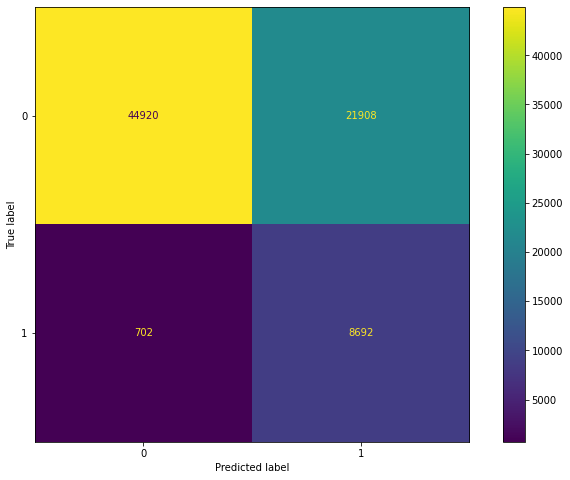

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_confusion_matrix(model, X_test_os, y_test_os, ax=ax)
fig.savefig('../DataAnalysisAndViz/plots/conf_mat.jpeg', dpi=82)
plt.show()

**Observation**
1. The model predicts the positive class when it was actually the positive class 8692 times
2. The model predicts the positive class when it was actually the negative class 21908 times 
3. The model predicts the negative class when it was actually the positive class 702 times 
4. The model predicts the negative class when it was actually the negative class 449270 times 

In [24]:
precision_score(y_test_os, y_pred, pos_label=1)

0.28405228758169937

In [25]:
recall_score(y_test_os, y_pred, pos_label=1)

0.9252714498616138

In [26]:
f1_score(y_test_os, y_pred, pos_label=1)

0.434665199779967

The `precision` is the proportion of true positives out of all detected positives or simply

**TP / (TP + FP)**

8692 / (8692 + 21908) = 0.284

The `recall` is the number of true positives that are correctly classified or simply

**TP / (TP + FN)**

8692 / (8692 + 702) = 0.925

Finally, the `f1 score` is the harmonic mean of precision and recall. This computes to 44%

Precision and recall and by extension, f1 score are skewed one class, if we flip the positive class, we get a total new precision and recall (even f1 score)

In [27]:
precision_score(y_test_os, y_pred, pos_label=0)

0.9846126868616019

In [28]:
recall_score(y_test_os, y_pred, pos_label=0)

0.6721733405159513

In [29]:
f1_score(y_test_os, y_pred, pos_label=0)

0.7989328590484659

This is because, the metrics does not take `True Negative` into accounts, in this case, our model does not care how it performs in detecting policy holders that are not interested in vehicle insurance

In business context

- If advertising vehicle insurance to health insurance policy holder would be very expensive, then we optimize the model for precision, because we want to be very sure that they would be interested
- If advertising vehicle insurance to health insurance policy holder would not be very expensive, then we optimize the model for recall, because we want to advertise to everyone that would be interested.
> A naive model would advertise to all policy holders

In this context, we would optimize for precision

In [30]:
y_scores = model.predict_proba(X_test_os)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test_os, y_scores, pos_label=1)

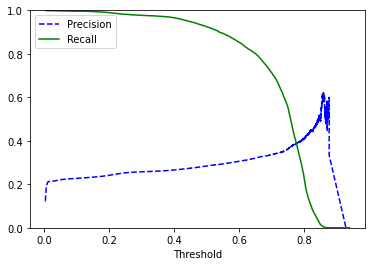

In [31]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [32]:
thresholds

array([0.00471235, 0.00471309, 0.00471341, ..., 0.87738352, 0.92893804,
       0.94029174])

In [33]:
threshold = .6

In [34]:
y_pred_60 = y_scores > threshold
precision_score(y_pred_60, y_test_os, pos_label=1)

0.8538428784330424

In [35]:
recall_score(y_pred_60, y_test_os, pos_label=1)

0.306121670101519

In [36]:
y_pred = y_pred_60.astype(np.int32)

This model has a precision score of 85% and recall score of 31%

## Model Building and Saving

In [37]:
# model instantiation
model = pickle.load(open('../models/gradient_boost.pkl', 'rb'))

In [38]:
model.fit(X_train_os, y_train_os)

GradientBoostingClassifier(learning_rate=0.09184489795918369, max_depth=10,
                           max_features='sqrt', min_samples_split=20000,
                           n_estimators=60, random_state=10, subsample=0.8)

In [39]:
pickle.dump(model, open('../models/gradient_boost.pkl', 'wb'))

In [40]:
data = model_pipeline.load_data('../Data/train.csv')
pred, proba, full_pipeline = model_pipeline.run_pipeline(data, model)
pickle.dump(full_pipeline, open('../models/pipeline.pkl', 'wb'))

In [42]:
model = model_pipeline.load_model('../models/gradient_boost.pkl')
pipeline = model_pipeline.load_pipeline('../models/pipeline.pkl')
data = model_pipeline.load_data('../Data/test.csv')
pred, proba, full_pipeline = model_pipeline.run_pipeline(data, model, pipeline)

data = pd.read_csv('../Data/test.csv')
data['Prediction'] = pred
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prediction
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,1
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,1
